<a href="https://colab.research.google.com/github/Punji18/Customer_Segmentation_and_Promotion_Strategy.ipynb/blob/main/Customer_Segmentation_and_Promotion_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset shape: (10000, 42)

Column info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            10000 non-null  int64  
 1   Birth_Year             10000 non-null  int64  
 2   Education_Level        10000 non-null  object 
 3   Marital_Status         10000 non-null  object 
 4   Annual_Income          10000 non-null  float64
 5   Kids_Home              10000 non-null  int64  
 6   Teens_Home             10000 non-null  int64  
 7   Customer_Since         10000 non-null  object 
 8   Last_Purchase_Recency  10000 non-null  int64  
 9   Spent_Wine             10000 non-null  int64  
 10  Spent_Fruits           10000 non-null  int64  
 11  Spent_Meat             10000 non-null  int64  
 12  Spent_Fish             10000 non-null  int64  
 13  Spent_Sweets           10000 non-null  int64  
 14  Spent_Gold   

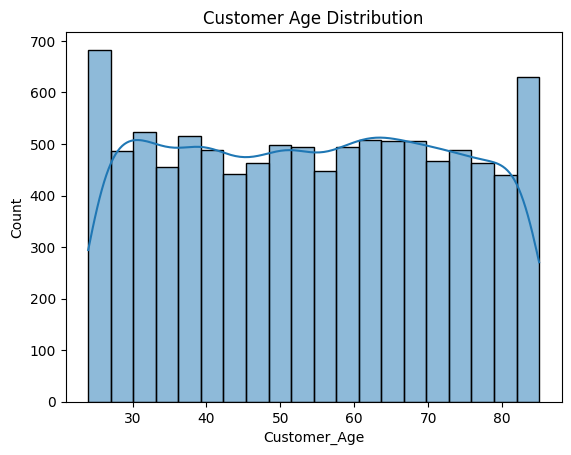

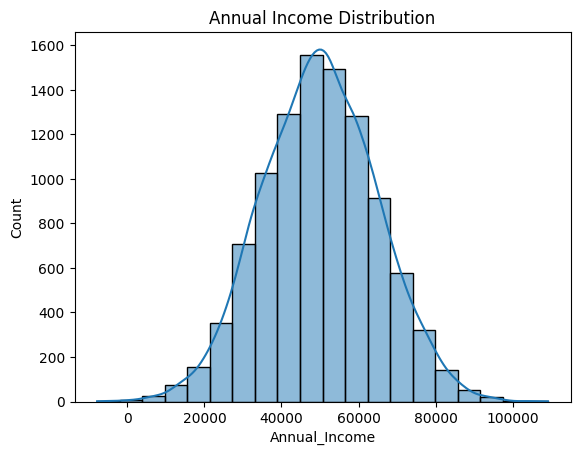

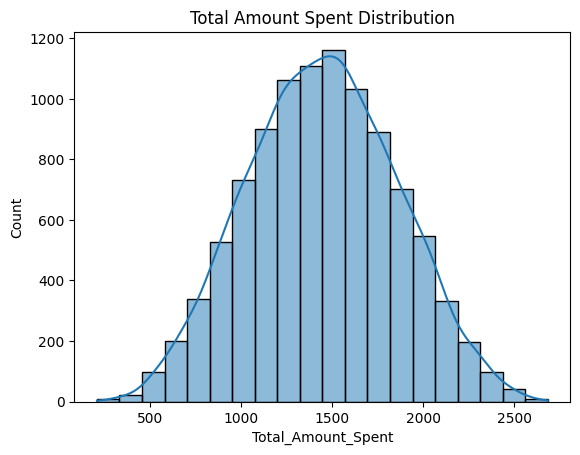

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the file (adjust path if using Drive)
file_path = '/content/drive/MyDrive/customer_data.csv'  # Update if needed
df = pd.read_csv(file_path)

# Basic info
print("Dataset shape:", df.shape)
print("\nColumn info:\n")
df.info()

# Null values
print("\nNull values:\n")
print(df.isnull().sum())

# Summary statistics
print("\nDescriptive statistics:\n")
print(df.describe())

# Sample preview
df.head()
# Example: change column names if needed based on your dataset

# Age distribution
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

# Income distribution
sns.histplot(df['Annual_Income'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

# Spending Score
sns.histplot(df['Total_Amount_Spent'], bins=20, kde=True)
plt.title('Total Amount Spent Distribution')
plt.show()

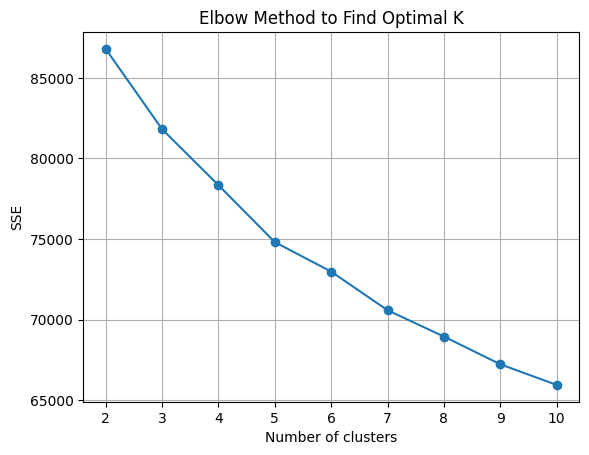

In [ ]:
# Import
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
cluster_data = df[[
    'Annual_Income',
    'Customer_Age',
    'Total_Amount_Spent',
    'Last_Purchase_Recency',
    'Spent_Wine',
    'Spent_Fruits',
    'Spent_Meat',
    'Spent_Fish',
    'Spent_Sweets',
    'Spent_Gold'
]]

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Find optimal k using elbow method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


Customer_Cluster
1    2242
4    2143
2    1990
0    1918
3    1707
Name: count, dtype: int64
                  Annual_Income  Customer_Age  Total_Amount_Spent  \
Customer_Cluster                                                    
0                       50539.2          55.3              1384.9   
1                       49339.8          53.2              1988.8   
2                       49898.8          54.2              1345.8   
3                       49894.1          53.8               867.4   
4                       50078.7          54.6              1495.0   

                  Last_Purchase_Recency  Spent_Wine  Spent_Fruits  Spent_Meat  \
Customer_Cluster                                                                
0                                  45.7       353.3          49.1       604.4   
1                                  48.9       752.8          52.0       597.0   
2                                  48.3       274.6          50.2       366.5   
3                 

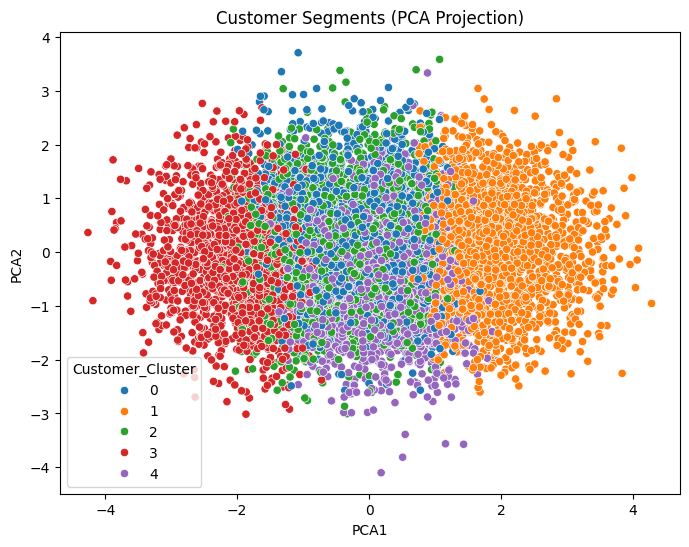

In [ ]:
# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Customer_Cluster'] = kmeans.fit_predict(scaled_data)

# View cluster sizes
print(df['Customer_Cluster'].value_counts())
# Group-wise summary
cluster_summary = df.groupby('Customer_Cluster')[[
    'Annual_Income',
    'Customer_Age',
    'Total_Amount_Spent',
    'Last_Purchase_Recency',
    'Spent_Wine',
    'Spent_Fruits',
    'Spent_Meat',
    'Spent_Fish',
    'Spent_Sweets',
    'Spent_Gold'
]].mean().round(1)

print(cluster_summary)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Customer_Cluster', palette='tab10')
plt.title("Customer Segments (PCA Projection)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the file again to ensure the correct dataframe is used
file_path = '/content/drive/MyDrive/customer_data.csv'  # Update if needed
df = pd.read_csv(file_path)

# Select relevant features for regression
X = df[['Annual_Income', 'Customer_Age', 'Last_Purchase_Recency']]
y = df['Total_Amount_Spent']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print results
print("📊 Linear Regression:")
print("R² Score:", r2_lr)
print("RMSE:", rmse_lr)

print("\n🌲 Random Forest:")
print("R² Score:", r2_rf)
print("RMSE:", rmse_rf)

📊 Linear Regression:
R² Score: -0.004903716559041538
RMSE: 408.3147869795021

🌲 Random Forest:
R² Score: -0.11476751407884334
RMSE: 430.0560225474118


In [ ]:
# STEP 1: Install & import required packages
from google.colab import drive
import pandas as pd

# STEP 2: Mount Google Drive
drive.mount('/content/drive')

# STEP 3: Load your CSV file from Drive (change the path to your file)
file_path = '/content/drive/MyDrive/customer_data.csv'  # <-- update this if your path is different
df = pd.read_csv(file_path)

# STEP 4: Rename columns for consistency (if needed)
# Removed renaming of 'ID' to 'Customer_ID' as it's already named correctly.
# Removed renaming of 'Age' to 'Customer_Age' as it's already named correctly.
# Removed renaming of 'Income' to 'Annual_Income' as it's already named correctly.
# Removed renaming of 'Spend' to 'Total_Amount_Spent' as it's already named correctly.
# Removed renaming of 'Product' to 'Product_Category' as 'Product' doesn't exist.
# Removed renaming of 'Cluster' to 'Customer_Cluster' as 'Cluster' doesn't exist and 'Customer_Cluster' is created later.
# df.rename(columns={
#     'ID': 'Customer_ID',
#     'Age': 'Customer_Age',
#     'Income': 'Annual_Income',
#     'Spend': 'Total_Amount_Spent',
#     'Product': 'Product_Category', # This column does not exist
#     'Cluster': 'Customer_Cluster' # This column does not exist at this stage
# }, inplace=True)

# STEP 5: Drop duplicates
df.drop_duplicates(inplace=True)

# STEP 6: Drop rows with missing values in key columns
# Removed 'Product_Category' and 'Customer_Cluster' as they don't exist at this stage.
df.dropna(subset=['Customer_ID', 'Customer_Age', 'Annual_Income', 'Total_Amount_Spent'], inplace=True)

# STEP 7: Ensure correct data types
df['Customer_ID'] = df['Customer_ID'].astype(str)
df['Customer_Age'] = df['Customer_Age'].astype(int)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Total_Amount_Spent'] = df['Total_Amount_Spent'].astype(float)
# Removed conversion for non-existent columns
# df['Product_Category'] = df['Product_Category'].astype(str)
# df['Customer_Cluster'] = df['Customer_Cluster'].astype(int)


# STEP 8: Save cleaned data to your Google Drive
cleaned_path = '/content/drive/MyDrive/cleaned_customer_data.csv'
df.to_csv(cleaned_path, index=False)

print("✅ Cleaned file saved to:", cleaned_path)
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Mount Google Drive if not already done
from google.colab import drive
drive.mount('/content/drive')

# Load your cleaned file (adjust path if needed)
df = pd.read_csv('/content/drive/MyDrive/cleaned_customer_data.csv')

# Select features for clustering
features = ['Customer_Age', 'Annual_Income', 'Total_Amount_Spent']
X = df[features]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Cleaned file saved to: /content/drive/MyDrive/cleaned_customer_data.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
